## HUAWEI HACKATHON

In [1]:
import pandas as pd
import numpy as np
from pathlib import Path

GLOBAL_SEED = 10

### Get Input Data

In [2]:
# ALL PATHS..

labels_path = Path('Data/Preprocessed_Data/train_label/train_label-formatted.csv')
labelled_train_data_dir = Path('Data/Raw_Data/train_image/labeled_data')

generator_labels_path = Path('Data/Preprocessed_Data/generator_labels')

In [3]:
## Read Data.

df_labels = pd.read_csv(labels_path,header=None)

df_labels

,0,1,2,3,4
0,train_00000.png,1,0,0,0
1,train_00001.png,0,0,0,0
2,train_00002.png,0,0,0,0
3,train_00003.png,0,0,0,0
4,train_00004.png,0,0,0,0
...,...,...,...,...,...
29159,train_29159.png,0,0,0,0
29160,train_29160.png,0,0,0,0
29161,train_29161.png,0,0,0,0
29162,train_29162.png,6,0,0,0


In [4]:
# Combine columns 1,2,3,4 and make it into error (0 or 1)

df_labels.columns = ['Image_Name',1,2,3,4]

df_labels['error'] = df_labels.loc[:,[1,2,3,4]].sum(axis=1)

df_labels['error'] = df_labels['error'].clip(lower=0, upper=1)

df_labels = df_labels.drop(columns=[1,2,3,4])

df_labels

,Image_Name,error
0,train_00000.png,1
1,train_00001.png,0
2,train_00002.png,0
3,train_00003.png,0
4,train_00004.png,0
...,...,...
29159,train_29159.png,0
29160,train_29160.png,0
29161,train_29161.png,0
29162,train_29162.png,1


## Data Preprocessing

### Cropping Images (Surangana)

In [5]:
import os
from PIL import Image 

train_images_dir = Path("Data/Raw_Data/train_image/labeled_data/")
train_cropped_dir = Path("Data/Preprocessed_Data/train_images/labelled_data_cropped/")

os.makedirs(train_cropped_dir,exist_ok=True)

file_names = os.listdir(train_images_dir)

# Create Cropped Images..
for file_name in file_names:
    print(f'Processing File: {file_name}')
    file_path = str(train_images_dir)+f'\{file_name}'
    im = Image.open(f'.\{file_path}')
    img_width, img_height = im.size

    img_left_bound = 0
    img_top_bound = img_height / 8
    img_right_bound = img_width
    img_bottom_bound = 7 * img_height / 8

    cropped =im.crop((img_left_bound, img_top_bound, img_right_bound, img_bottom_bound)) 
    output_file= str(train_cropped_dir)+f'\{file_name}'
    cropped.save(output_file)

Processing File: train_00000.png
Processing File: train_00001.png
Processing File: train_00002.png
Processing File: train_00003.png
Processing File: train_00004.png
Processing File: train_00005.png
Processing File: train_00006.png
Processing File: train_00007.png
Processing File: train_00008.png
Processing File: train_00009.png
Processing File: train_00010.png
Processing File: train_00011.png
Processing File: train_00012.png
Processing File: train_00013.png
Processing File: train_00014.png
Processing File: train_00015.png
Processing File: train_00016.png
Processing File: train_00017.png
Processing File: train_00018.png
Processing File: train_00019.png
Processing File: train_00020.png
Processing File: train_00021.png
Processing File: train_00022.png
Processing File: train_00023.png
Processing File: train_00024.png
Processing File: train_00025.png
Processing File: train_00026.png
Processing File: train_00027.png
Processing File: train_00028.png
Processing File: train_00029.png
Processing

### Prepare Dataframe for Generator.. 

In [12]:
# Change the referenceto Cropped Images Folder..

labelled_train_data_dir = train_cropped_dir

In [13]:
## {% Stage02_preprocessing.py %} ##

import os
from sklearn.model_selection import train_test_split

## Run.. Preprocessing--Raw-Data-Files-Segregator.ipynb

df_data_train = pd.DataFrame(columns=['filename','class'])
df_data_valid = pd.DataFrame(columns=['filename','class'])

df_data_all = pd.DataFrame(columns=['filename','class'])

df_data_test = pd.DataFrame(columns=['filename','class'])

for root, dirs, files in os.walk('.'):
    # print(root, dirs, files)
    if root in ['.\\'+str(labelled_train_data_dir)]:#,'.\\Extra_Data\\real_vs_fake\\real-vs-fake\\valid\\fake']:
        print(len(files))
        for file in files:
            file_error_class = int(df_labels[df_labels['Image_Name'] == file]['error'])
            print(f'Processing file: {file}')
            if file_error_class == None:
                print(f'FILE {file} NOT FOUND!')
            df_data_all = df_data_all.append({
                'filename' : root+'\\'+file,
                'class' : 'yes' if file_error_class==1 else 'no'
            }, ignore_index = True)


    # if root in ['.\\Data\\test']:#,'.\\Extra_Data\\train\\training_real']:#,'.\\Extra_Data\\real_vs_fake\\real-vs-fake\\valid\\real']:
    #     print(len(files))
    #     for file in files:
    #         # Do a random split..
    #         df_data_test = df_data_test.append({
    #             'filename' : root+'\\'+file,
    #             'class' : 'None'
    #         }, ignore_index = True)
        
df_data_all, df_data_all['class'].value_counts()

29164
Processing file: train_00000.png
Processing file: train_00001.png
Processing file: train_00002.png
Processing file: train_00003.png
Processing file: train_00004.png
Processing file: train_00005.png
Processing file: train_00006.png
Processing file: train_00007.png
Processing file: train_00008.png
Processing file: train_00009.png
Processing file: train_00010.png
Processing file: train_00011.png
Processing file: train_00012.png
Processing file: train_00013.png
Processing file: train_00014.png
Processing file: train_00015.png
Processing file: train_00016.png
Processing file: train_00017.png
Processing file: train_00018.png
Processing file: train_00019.png
Processing file: train_00020.png
Processing file: train_00021.png
Processing file: train_00022.png
Processing file: train_00023.png
Processing file: train_00024.png
Processing file: train_00025.png
Processing file: train_00026.png
Processing file: train_00027.png
Processing file: train_00028.png
Processing file: train_00029.png
Proc

(                                                filename class
 0      .\Data\Preprocessed_Data\train_images\labelled...   yes
 1      .\Data\Preprocessed_Data\train_images\labelled...    no
 2      .\Data\Preprocessed_Data\train_images\labelled...    no
 3      .\Data\Preprocessed_Data\train_images\labelled...    no
 4      .\Data\Preprocessed_Data\train_images\labelled...    no
 ...                                                  ...   ...
 29159  .\Data\Preprocessed_Data\train_images\labelled...    no
 29160  .\Data\Preprocessed_Data\train_images\labelled...    no
 29161  .\Data\Preprocessed_Data\train_images\labelled...    no
 29162  .\Data\Preprocessed_Data\train_images\labelled...   yes
 29163  .\Data\Preprocessed_Data\train_images\labelled...    no
 
 [29164 rows x 2 columns],
 no     25767
 yes     3397
 Name: class, dtype: int64)

In [14]:
## PARAMS ##

TRAIN_TEST_SPLIT = 0.96

In [15]:


df_data_train, df_data_valid = train_test_split(df_data_all,train_size=TRAIN_TEST_SPLIT, random_state=GLOBAL_SEED)
df_data_train, df_data_valid

(                                                filename class
 23039  .\Data\Preprocessed_Data\train_images\labelled...    no
 17016  .\Data\Preprocessed_Data\train_images\labelled...    no
 20778  .\Data\Preprocessed_Data\train_images\labelled...    no
 28219  .\Data\Preprocessed_Data\train_images\labelled...    no
 24368  .\Data\Preprocessed_Data\train_images\labelled...    no
 ...                                                  ...   ...
 7291   .\Data\Preprocessed_Data\train_images\labelled...    no
 28017  .\Data\Preprocessed_Data\train_images\labelled...    no
 17728  .\Data\Preprocessed_Data\train_images\labelled...   yes
 7293   .\Data\Preprocessed_Data\train_images\labelled...    no
 17673  .\Data\Preprocessed_Data\train_images\labelled...    no
 
 [27997 rows x 2 columns],
                                                 filename class
 8331   .\Data\Preprocessed_Data\train_images\labelled...    no
 12946  .\Data\Preprocessed_Data\train_images\labelled...    no
 23940  .\D

In [16]:
## {% Stage03_preprocessing-2.py %} ##

df_data_train, df_data_valid = train_test_split(df_data_all,train_size=TRAIN_TEST_SPLIT, random_state=GLOBAL_SEED)
df_data_train, df_data_valid

(                                                filename class
 23039  .\Data\Preprocessed_Data\train_images\labelled...    no
 17016  .\Data\Preprocessed_Data\train_images\labelled...    no
 20778  .\Data\Preprocessed_Data\train_images\labelled...    no
 28219  .\Data\Preprocessed_Data\train_images\labelled...    no
 24368  .\Data\Preprocessed_Data\train_images\labelled...    no
 ...                                                  ...   ...
 7291   .\Data\Preprocessed_Data\train_images\labelled...    no
 28017  .\Data\Preprocessed_Data\train_images\labelled...    no
 17728  .\Data\Preprocessed_Data\train_images\labelled...   yes
 7293   .\Data\Preprocessed_Data\train_images\labelled...    no
 17673  .\Data\Preprocessed_Data\train_images\labelled...    no
 
 [27997 rows x 2 columns],
                                                 filename class
 8331   .\Data\Preprocessed_Data\train_images\labelled...    no
 12946  .\Data\Preprocessed_Data\train_images\labelled...    no
 23940  .\D

In [17]:
# Save the Generator files as csv..
df_data_train.to_csv(str(generator_labels_path)+'\\'+'df_data_train_generator.csv',index=False)
df_data_valid.to_csv(str(generator_labels_path)+'\\'+'df_data_valid_generator.csv',index=False)

df_data_train = pd.read_csv(str(generator_labels_path)+'\\'+'df_data_train_generator.csv')
df_data_valid = pd.read_csv(str(generator_labels_path)+'\\'+'df_data_valid_generator.csv')

## Building a Basic Model..

In [11]:
from numpy.random import seed
from pandas import read_csv, DataFrame
from sklearn.preprocessing import minmax_scale

import tensorflow as tf
from tensorflow import keras as K

from tensorflow.keras.optimizers import SGD
from tensorflow.keras.models import Sequential
from keras.utils.np_utils import to_categorical
from tensorflow.keras.layers import Conv2D, MaxPooling2D
from tensorflow.keras.layers import Flatten,Dense,Dropout,Activation, LeakyReLU
from tensorflow.keras.layers import BatchNormalization
import numpy as np
import pandas as pd
import sys

from tensorflow.keras import * 
import tensorflow.keras 
print( tensorflow.keras.__version__)

K.backend.set_image_data_format('channels_last')
##K.set_image_dim_ordering('tf')
from sklearn.metrics import log_loss
from sklearn.metrics import accuracy_score
from tensorflow.keras.metrics import binary_accuracy
from tensorflow.keras.metrics import categorical_accuracy

import matplotlib.pyplot as plt

2.9.0


In [12]:
# Read Generator labels..

df_data_train = pd.read_csv(str(generator_labels_path)+'\\'+'df_data_train_generator.csv')
df_data_valid = pd.read_csv(str(generator_labels_path)+'\\'+'df_data_valid_generator.csv')

In [13]:
# Check if i have a GPU..

from tensorflow.python.client import device_lib

print(device_lib.list_local_devices())
# tensorflow.keras
print(tf.config.list_physical_devices())

[name: "/device:CPU:0"
device_type: "CPU"
memory_limit: 268435456
locality {
}
incarnation: 14124467145085803727
xla_global_id: -1
, name: "/device:GPU:0"
device_type: "GPU"
memory_limit: 6245318656
locality {
  bus_id: 1
  links {
  }
}
incarnation: 3887309786909870693
physical_device_desc: "device: 0, name: NVIDIA GeForce RTX 2080 Super, pci bus id: 0000:01:00.0, compute capability: 7.5"
xla_global_id: 416903419
]
[PhysicalDevice(name='/physical_device:CPU:0', device_type='CPU'), PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]


In [14]:
preprocessed_data_path = 'Data\\Preprocessed_Data'

In [15]:

# IMG_WIDTH, IMG_HEIGHT = 1000, 500

# For Cropped Images..
IMG_HEIGHT, IMG_WIDTH = 900, 500

train_data_dir      = str(preprocessed_data_path)+'\\train_images\\'
validation_data_dir = preprocessed_data_path+'\\validation_images\\'

BATCH_SIZE = 3

In [16]:
# import time
# start = time.time()

# def define_and_compile_model():
    
#     tf.keras.backend.clear_session()

#     if K.backend.image_data_format() == 'channels_first':
#         input_shape = (3, IMG_HEIGHT, IMG_WIDTH)
#     else:
#         input_shape = (IMG_HEIGHT, IMG_WIDTH, 3)
        
#     mod = Sequential()
#     mod.add(BatchNormalization(input_shape=input_shape))
#     mod.add(Conv2D(32, (3, 3),activation='relu'))
#     mod.add(MaxPooling2D(pool_size=(4, 4)))

#     mod.add(BatchNormalization(input_shape=(IMG_HEIGHT, IMG_WIDTH, 2)))
#     mod.add(Conv2D(64, (3, 3),activation='relu'))
#     mod.add(MaxPooling2D(pool_size=(2, 2)))

#     mod.add(BatchNormalization(input_shape=input_shape))
#     mod.add(Conv2D(128, (3, 3),activation='relu'))
#     mod.add(MaxPooling2D(pool_size=(3, 3)))

#     # the model so far outputs 3D feature maps (height, width, features)

#     mod.add(Flatten())  # this converts our 3D feature maps to 1D feature vectors
#     mod.add(Dense(256, activation='relu'))
#     mod.add(Dense(128, activation='relu'))
#     mod.add(Dense(32, activation='relu'))
#     mod.add(Dropout(0.2))
#     mod.add(Dense(8))
#     mod.add(Activation('sigmoid'))
#     # COMPILE
#     mod.compile(loss='categorical_crossentropy',
#                 optimizer='adam',#tensorflow.keras.optimizers.Adam(learning_rate=1e-4),
#                 metrics=['accuracy'])
#     return mod

# model = define_and_compile_model()
# end = time.time()
# print(end - start)

In [18]:
import time
start = time.time()

def define_resnet50_model():
    
    tf.keras.backend.clear_session()
    mod = Sequential()
    mod.add(
        tf.keras.applications.ResNet50(
            include_top=True,
            weights=None,#'imagenet',
            input_tensor=None,
            input_shape=(IMG_HEIGHT, IMG_WIDTH, 3),
            pooling=None,
            classes=128,
            classifier_activation='relu'
        )
    )
    mod.add(Dense(32))
    mod.add(LeakyReLU())
    mod.add(Dropout(0.2))
    mod.add(Dense(1))
    mod.add(LeakyReLU())

    mod.compile(loss='binary_crossentropy',
                optimizer='adam',#tensorflow.keras.optimizers.Adam(learning_rate=3e-4),
                metrics=['accuracy'])

    return mod

model = define_resnet50_model()

end = time.time()
print(end - start)

2.4283876419067383


In [20]:
model.save('Resnet50V2.h5',save_format='h5')

In [21]:
model = K.models.load_model('Resnet50V2.h5')

In [22]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 resnet50 (Functional)       (None, 128)               23849984  
                                                                 
 dense (Dense)               (None, 32)                4128      
                                                                 
 leaky_re_lu (LeakyReLU)     (None, 32)                0         
                                                                 
 dropout (Dropout)           (None, 32)                0         
                                                                 
 dense_1 (Dense)             (None, 1)                 33        
                                                                 
 leaky_re_lu_1 (LeakyReLU)   (None, 1)                 0         
                                                                 
Total params: 23,854,145
Trainable params: 23,801,025
No

In [34]:
from keras.preprocessing.image import ImageDataGenerator

# TODO: Crop the top and botton of image..

# Data Generation Objects..
train_datagen = ImageDataGenerator(
    rescale=1. / 255,
    rotation_range=10,
    shear_range=0.2,
    #zoom_range=0.2,
    #width_shift_range=0.2,
    #height_shift_range=0.2,
    horizontal_flip=True,
    vertical_flip=True,
    )
test_datagen = ImageDataGenerator(
    rescale=1. / 255,
    rotation_range=10,
    shear_range=0.2,
    #zoom_range=0.2,
    #width_shift_range=0.2,
    #height_shift_range=0.2,
    horizontal_flip=True,
    vertical_flip=True,
    
    )

train_generator = train_datagen.flow_from_dataframe(
    df_data_train,
    shuffle=True,
    target_size=(IMG_WIDTH, IMG_HEIGHT),
    batch_size=BATCH_SIZE,
    class_mode='binary',
    seed=GLOBAL_SEED,
    )

validation_generator = test_datagen.flow_from_dataframe(
    df_data_valid,
    shuffle=True,
    target_size=(IMG_WIDTH, IMG_HEIGHT),
    batch_size=BATCH_SIZE,
    class_mode='binary',
    seed=GLOBAL_SEED
    )

Found 27997 validated image filenames belonging to 2 classes.
Found 1167 validated image filenames belonging to 2 classes.


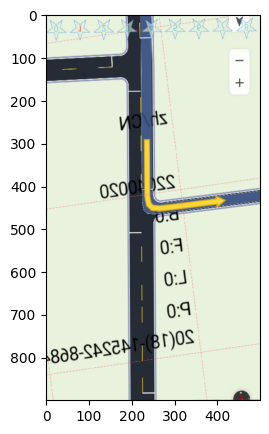

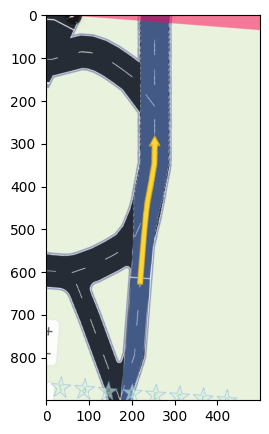

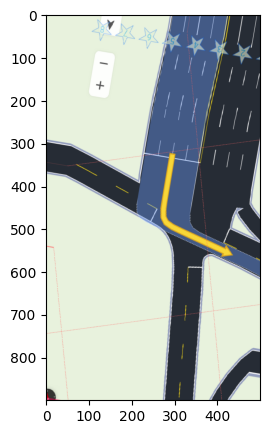

In [35]:


# Sample Some Images from Generator..
for img in train_generator[0][0]:
  plt.figure(figsize=(10,5))
  plt.imshow(img)
  plt.show()

## GLOBAL PARAMS

In [36]:
##########

# CUR_TRAINING_START_EPOCH = 4 # Model_CheckPoint_Resnet
CUR_TRAINING_START_EPOCH = 2 # Model_CheckPoint_Resnet_cropped


##########

#MODEL_CHECKPOINT_NAME = 'Model_CheckPoint_Resnet'
MODEL_CHECKPOINT_NAME = 'Model_CheckPoint_Resnet_cropped'

##########

In [37]:
# Define Callbacks for Early Stopping and Checkpointing..
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint, ReduceLROnPlateau
import json

CUR_TRAINING_EPOCH = CUR_TRAINING_START_EPOCH

def load_model_history():
    model_history = dict()
    with open(MODEL_CHECKPOINT_NAME+'_history.json', 'r') as f:
        model_history = json.load(f)
    return model_history

# cur_model_history = load_model_history()

cur_model_history = dict()

MODEL_HISTORY_SKIP_COUNT = 10

class GetEpochCallback(K.callbacks.Callback):
    def on_epoch_begin(self, epoch, logs=None):
        self.epoch = epoch
        CUR_TRAINING_EPOCH = epoch
        print('Starting Epoch: ',CUR_TRAINING_EPOCH)
        if str(epoch) not in cur_model_history.keys():
            cur_model_history[epoch] = {'accuracy':[],'loss':[],'val_accuracy':[],'val_loss':[]}

    def on_train_batch_end(self, batch, logs=None):
        #print(batch, self.epoch)
        if batch%MODEL_HISTORY_SKIP_COUNT==0:
            cur_model_history[self.epoch]['accuracy'].append(logs["accuracy"])
            cur_model_history[self.epoch]['loss'].append(logs["loss"])
    def on_test_batch_end(self, batch, logs=None):
        #print(logs)
        #print(f'val_loss : {logs["loss"]} - val_accuracy: {logs["accuracy"]}', flush=True)
        # if batch%MODEL_HISTORY_SKIP_COUNT==0:
        cur_model_history[self.epoch]['val_accuracy'].append(logs["accuracy"])
        cur_model_history[self.epoch]['val_loss'].append(logs["loss"])

    def on_epoch_end(self, epoch, logs=None):
        #print(epoch)
        CUR_TRAINING_START_EPOCH = epoch
        self.epoch = epoch
        # Save to file..
        with open(MODEL_CHECKPOINT_NAME+'_history.json', 'w') as f:
            json.dump(cur_model_history, f)


keras_callbacks=[
    EarlyStopping(monitor='val_loss',patience=7,mode='min',min_delta=0.001),#, verbose=2),
    ModelCheckpoint('Checkpoints\\'+MODEL_CHECKPOINT_NAME,monitor='val_loss',save_best_only=True),
    ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=3, verbose=1, 
                              min_delta=0.0001
                             ),
    GetEpochCallback()
    ]
    # verbose=2)]


In [38]:
tf.config.list_physical_devices('GPU')

[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]

In [39]:
MODEL_CHECKPOINT_NAME

'Model_CheckPoint_Resnet_cropped'

In [40]:
if CUR_TRAINING_START_EPOCH > 0:
    model.load_weights(MODEL_CHECKPOINT_NAME)

In [41]:
# Experiment Details:

CUR_TRAINING_START_EPOCH, MODEL_CHECKPOINT_NAME

(0, 'Model_CheckPoint_Resnet_cropped')

In [42]:
from tabnanny import verbose
import time
start = time.time()

model_history = ''

def fit_resume(starting_epoch):
    global model
    try:
        with tf.device('/device:GPU:0'):
            model_history = model.fit(train_generator,
                                    # steps_per_epoch=2500,
                                    initial_epoch=starting_epoch,
                                    epochs=4,
                                    workers=14,
                                    #use_multiprocessing=True,w
                                    validation_data=validation_generator,
                                    callbacks=keras_callbacks)
    except Exception as e: 
        print('Failed! : ',str(e))
        print('Clear Keras and retry..')
        #model = define_and_compile_model()
        # Load Last Backup Weights..
        #model.load_weights(MODEL_CHECKPOINT_NAME)
        #fit_resume(CUR_TRAINING_EPOCH)

fit_resume(CUR_TRAINING_EPOCH)

end = time.time()
print(end - start)

Starting Epoch:  0
Epoch 1/5
9333/9333 [==============================] - ETA: 0s - loss: 0.3655 - accuracy: 0.8823

INFO:tensorflow:Assets written to: Checkpoints\Model_CheckPoint_Resnet_cropped\assets


INFO:tensorflow:Assets written to: Checkpoints\Model_CheckPoint_Resnet_cropped\assets


9333/9333 [==============================] - 2204s 234ms/step - loss: 0.3655 - accuracy: 0.8823 - val_loss: 6.0177 - val_accuracy: 0.8740 - lr: 0.0010
Starting Epoch:  1
Epoch 2/5
9333/9333 [==============================] - ETA: 0s - loss: 0.2498 - accuracy: 0.9348

INFO:tensorflow:Assets written to: Checkpoints\Model_CheckPoint_Resnet_cropped\assets


INFO:tensorflow:Assets written to: Checkpoints\Model_CheckPoint_Resnet_cropped\assets


9333/9333 [==============================] - 2188s 234ms/step - loss: 0.2498 - accuracy: 0.9348 - val_loss: 1.9546 - val_accuracy: 0.1320 - lr: 0.0010
Starting Epoch:  2
Epoch 3/5
  28/9333 [..............................] - ETA: 35:42 - loss: 0.2831 - accuracy: 0.9286

KeyboardInterrupt: 

In [ ]:
# TEMPORARY EXPERIMENTS DASHBOARD:

    # NOTE: Test these for 4 Epochs for now, for valid results..

    # FULL DATA EXPERIMENTS: ( ~35mins / Epoch )

        # Model_CheckPoint_Resnet: (1000x500 Input) (Raw Images) (Redo..) -- TODO: Run Again.. (Lil Fishy with High Results..)
            # Ep1: L: 0.2750 A: 0.9343 VL: 0. VA: 0.
            # Ep2: L: 0.2349 A: 0.9447 VL: 0. VA: 0.
            # Ep3: L: 0.2226 A: 0.9449 VL: 0. VA: 0.
            # Ep4: L: 0.1997 A: 0.9462 VL: 0. VA: 0.

        # Model_CheckPoint_Resnet_cropped: (1000x500 Input) (Cropped Images)
            # Ep1: L: 0.3655 A: 0.8823 VL: 6.0177 VA: 0.8740
            # Ep2: L: 0.2498 A: 0.9348 VL: 1.9546 VA: 0.1320 -- TODO: REDO THE WHOLE THING..
            # Ep3: L: 0. A: 0. VL: 0. VA: 0.
            # Ep4: L: 0. A: 0. VL: 0. VA: 0.
        
        # Model_CheckPoint_Resnet_cropped_fullsize: (1800x1080 Input) (Cropped Images) (NOTE: ON HOLD)
            # Ep1: L: 0. A: 0. VL: 0. VA: 0.
            # Ep2: L: 0. A: 0. VL: 0. VA: 0.
            # Ep3: L: 0. A: 0. VL: 0. VA: 0.
            # Ep4: L: 0. A: 0. VL: 0. VA: 0.
        
        # Model_CheckPoint_Resnet_fullsize: (2400x1080 Input) (Cropped Images) (NOTE: ON HOLD)
            # Ep1: L: 0. A: 0. VL: 0. VA: 0.
            # Ep2: L: 0. A: 0. VL: 0. VA: 0.
            # Ep3: L: 0. A: 0. VL: 0. VA: 0.
            # Ep4: L: 0. A: 0. VL: 0. VA: 0.

# TODO: PLANNED:

    # QUICK EXPERIMENTS: (SPE 2500) (~10 mins/Epoch)

        # Model_CheckPoint_Resnet: (1000x500 Input) (Raw Images) (Redo..) -- TODO: Run Again.. (Lil Fishy with High Results..)
            # Ep1: L: 0. A: 0. VL: 0. VA: 0.
            # Ep2: L: 0. A: 0. VL: 0. VA: 0.
            # Ep3: L: 0. A: 0. VL: 0. VA: 0.
            # Ep4: L: 0. A: 0. VL: 0. VA: 0.

        # Model_CheckPoint_Resnet_cropped: (1000x500 Input) (Cropped Images)
            # Ep1: L: 0.3655 A: 0.8823 VL: 6.0177 VA: 0.8740
            # Ep2: L: 0.2498 A: 0.9348 VL: 1.9546 VA: 0.1320 -- TODO: REDO THE WHOLE THING..
            # Ep3: L: 0. A: 0. VL: 0. VA: 0.
            # Ep4: L: 0. A: 0. VL: 0. VA: 0.
        
        # Model_CheckPoint_Resnet_cropped_fullsize: (1800x1080 Input) (Cropped Images)
            # Ep1: L: 0. A: 0. VL: 0. VA: 0.
            # Ep2: L: 0. A: 0. VL: 0. VA: 0.
            # Ep3: L: 0. A: 0. VL: 0. VA: 0.
            # Ep4: L: 0. A: 0. VL: 0. VA: 0.
        
        # Model_CheckPoint_Resnet_fullsize: (2400x1080 Input) (Cropped Images)
            # Ep1: L: 0. A: 0. VL: 0. VA: 0.
            # Ep2: L: 0. A: 0. VL: 0. VA: 0.
            # Ep3: L: 0. A: 0. VL: 0. VA: 0.
            # Ep4: L: 0. A: 0. VL: 0. VA: 0.

    # EXTENDED DATA EXPERIMENTS  (SPE FULL) (DATA: Unlabelled Images which are fit with previous best model):

        # Model_CheckPoint_Resnet_fullsize: (2400x1080 Input) (Cropped Images)
            # Ep1: L: 0. A: 0. VL: 0. VA: 0.
            # Ep2: L: 0. A: 0. VL: 0. VA: 0.
            # Ep3: L: 0. A: 0. VL: 0. VA: 0.
            # Ep4: L: 0. A: 0. VL: 0. VA: 0.

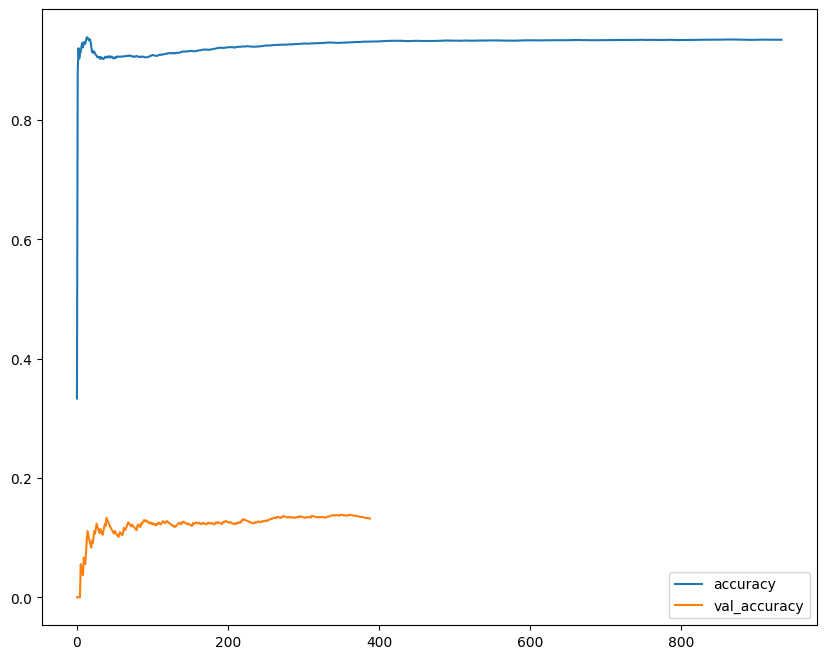

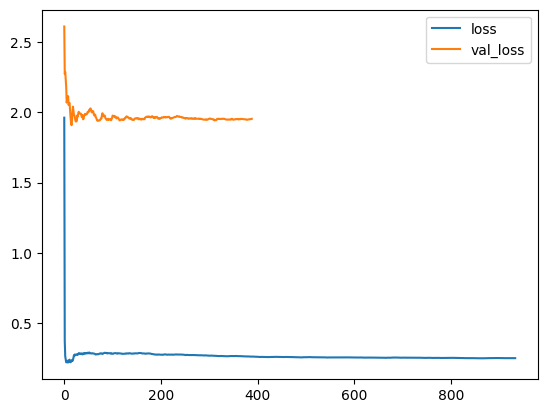

In [47]:
import matplotlib.pyplot as plt

def plot_acc_loss_for_epoch(epoch):
    plt.figure(figsize=(10,8))

    plt.plot(cur_model_history[epoch]['accuracy'], label='accuracy')
    plt.plot(cur_model_history[epoch]['val_accuracy'], label='val_accuracy')
    
    plt.legend()
    plt.show()
    
    plt.plot(cur_model_history[epoch]['loss'],label='loss')
    plt.plot(cur_model_history[epoch]['val_loss'],label='val_loss')
    plt.legend()
    plt.show()

plot_acc_loss_for_epoch(1)

In [52]:
model.load_weights('Checkpoints/'+MODEL_CHECKPOINT_NAME)

In [53]:
#MODEL_CHECKPOINT_NAME = 'Model_CheckPoint_Resnet_spe2500'
#MODEL_CHECKPOINT_NAME = 'Model_CheckPoint_Resnet_spe1500_e50'
#model.load_weights(MODEL_CHECKPOINT_NAME)

model.evaluate(validation_generator)

## Experiment: Model_CheckPoint_Resnet_cropped
    ## NOTE: SUSPICIOUSLY LOW VAL ACCURACY... (0.1318)

389/389 [==============================] - 197s 507ms/step - loss: 1.9802 - accuracy: 0.1285


[1.9802396297454834, 0.1285347044467926]

#### Templating FOR REFERENCE:

In [ ]:
## {% Stage02_preprocessing.py %} ##

def stage_02_preproccessing():
    ##
    ##
    ##
    pass

In [ ]:
## {% Stage02_preprocessing.py %} {% STAGE_NAME %} ##

def stage_02_preproccessing():
    ##
    ##
    ##
    pass